In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import os
import os.path as path
import wget

In [3]:
#intervalo de N a M en L divisiones
#np.linspace(N,M,L)
np.linspace(-10,10,10)

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

In [4]:
#arreglos numpay
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
#arreglos con valores desde N hasta M con saltos de L valores
#np.arage(N,M,3)
np.arange(2,100,3)

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50,
       53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98])

In [6]:
#uso de linspace
def pos_tiro_vertical(a,v,t):
    x = v*t - (1/2)*a*t**2
    return x

def vel_tiro_vertical(a,v,t):
    u = v -a*t
    return u

t = np.linspace(0,20,20)

x = pos_tiro_vertical(9.81,20,t)
v = vel_tiro_vertical(9.81,20,t)

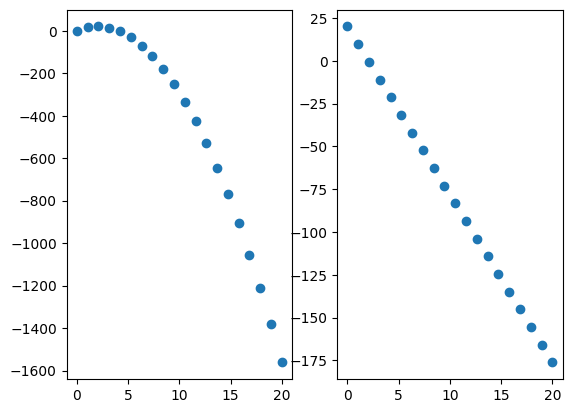

In [7]:
#plotear 1 o mas figuras --> N filas M columnas
# plt.subplots(N,M)

fig,axs = plt.subplots(1,2)

#axs[0] primera grafica
axs[0].scatter(t,x)
axs[1].scatter(t,v)


In [8]:
#Matrices de N fila y M columnas
#np.zeros((N,M))
M = np.zeros((2,4))
M


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
#Matriz transpuesta M.T
M[1,2] = 44
M[0,3] = 33
transpuesta = M.T
M,transpuesta

(array([[ 0.,  0.,  0., 33.],
        [ 0.,  0., 44.,  0.]]),
 array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0., 44.],
        [33.,  0.]]))

In [10]:
"""
Ejercicio: particula elicoidal
- [:,N] = M todos los valores en la columna N seran igual a M o si es un array, las posiciones concuerdan
"""
#valores
omega = 2*np.pi/10
# N = subdivisiones tiempo
N = 50
t = np.linspace(0,20,N)
# 3 columnas para posicion en x, y, z
r = np.zeros((N,3))

r[:,0] = np.cos(omega*t)
r[:,1] = np.sin(omega*t)
r[:,2] = 10*t



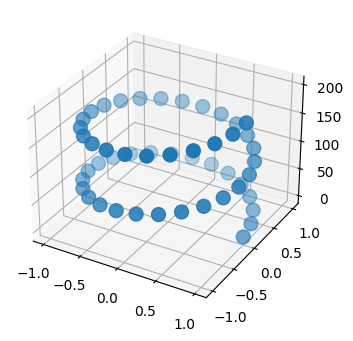

In [11]:
""" 
GRAFICOS EN 3D
"""
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(r[:,0],r[:,1],r[:,2],marker='o',s=100)


In [12]:
# Error de redondeo
# Maxima cantidad de precisión desimal 1.1e-16
error = 1
while 1+error !=1:
    error *= 0.5 
    
error

#error de truncamiento
#Sumatorias fallan del quinto ordend

1.1102230246251565e-16

DERIVADA

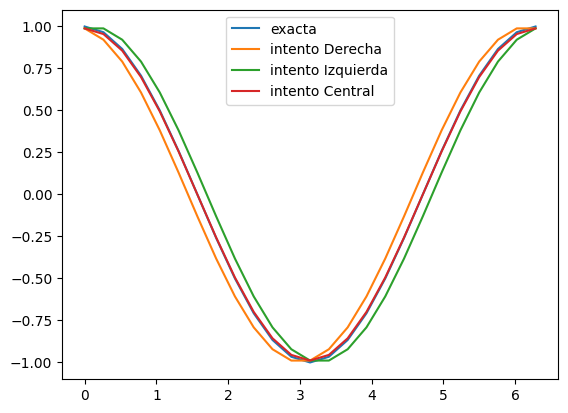

In [13]:
def function(x):
    return np.sin(x)

def ExactDerivative(x):
    return np.cos(x)

N = 25
x = np.linspace(0,2*np.pi,N)
h = x[1] - x[0]

# Derivada por derecha
def derivadaDere(f,x,h):
    return (f(x+h) - f(x))/h

# Derivada por izquierda
def derivadaIzqui(f,x,h):
    return (f(x) - f(x-h))/h

# Derivada central
def derivadaCen(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)

y = ExactDerivative(x)
d = derivadaDere(function,x,h)
i = derivadaIzqui(function,x,h)
c = derivadaCen(function,x,h)

plt.plot(x,y, label= "exacta")
plt.plot(x,d, label= "intento Derecha")
plt.plot(x,i, label= "intento Izquierda")
plt.plot(x,c, label= "intento Central")
plt.legend()

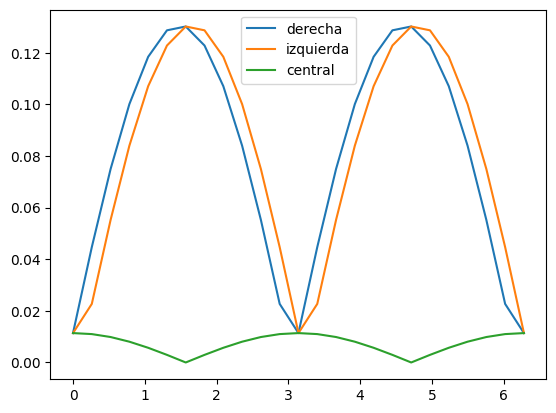

In [14]:
#Error en cada derivacion
#una sobrestima y la otra subestima en un punto y pasa igual en el otro lado

error_Der = np.abs(d-y)
error_Izq = np.abs(i-y)
error_Cen = np.abs(c-y)
plt.plot(x,error_Der, label="derecha")
plt.plot(x,error_Izq, label="izquierda")
plt.plot(x,error_Cen, label="central")
plt.legend()

NEWTON-RAPHSON - RAIZES

In [15]:
"MÉTODO DE NEWTON-RAPHSON"
# Es la derivada de un punto
# truncamiento en h^2 
"PARCIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAL"
# se toma en cuenta el 3 termino de teylor


'PARCIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAL'

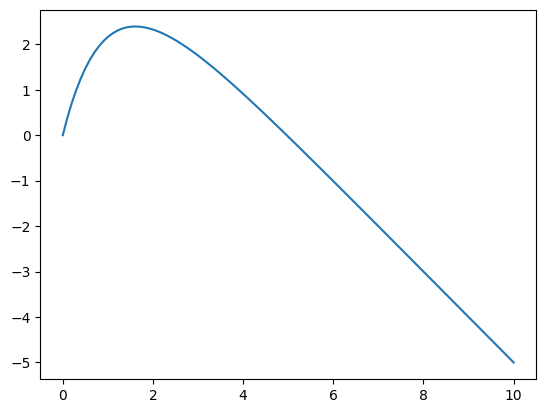

In [16]:
#Para encontrar los ceros es a partir de la sucecion de newton 

def funcion(x):
    return 5*(1-np.exp(-x)) - x

x = np.linspace(0,10,100)
y = funcion(x)
plt.plot(x,y)

In [17]:
def Derivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

#criterio de parada - parar hasta un limite de intentos - itmax o hasta una presicion epsilon
# xn sera el guest para la raiz

def newton(f,df,xn,itmax=1000,precision=1e-5):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
    
    return xn

newton(funcion,Derivative,5)

4.965114231744276

MÉTODO BISECCIÓN - RAIZES

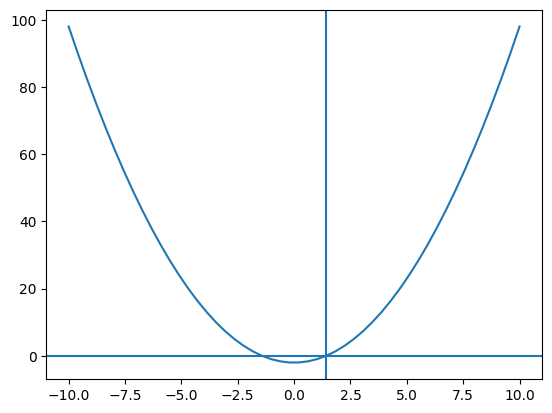

In [18]:
def cuadra(x):
    y = x**2-2
    return y

x = np.linspace(-10,10,50)
y = cuadra(x)

def puntoMedio(a,b):
    c = (a+b)/2
    return c

def biseccion(f,a,b):
    c = puntoMedio(a,b)
    while f(c)>0.01 or f(c)<-0.01:
        if f(c)<0:
            a = c 
            c = puntoMedio(a,b)
        elif f(c)>0:
            b = c
            c = puntoMedio(a,b)
            
    return c
n = biseccion(cuadra,0,5)
plt.axhline(y = 0)
plt.axvline(x = n)
plt.plot(x,y)

INTERPOLACIÓN DE LAGRANGE

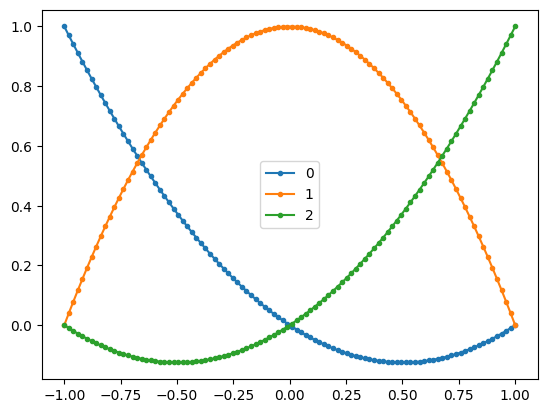

In [19]:
#La sumatoria de las bases cardinales (multiplicada por los valores evaluados respectivamente) - estas son linealmente indipendiente
#El grado del polinomio es n-1 de n puntos para interpolar
#Teorema de unicidad: 1 punto implica un polinomio de grado n, no es exacto

#funciones dentro de duplas
L =( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1))
#L[1](0) = 1

x = np.linspace(-1,1,100)

#matriz de 3xlos puntos del linspace
F = np.zeros((x.shape[0],3))

#evalua todos los puntos en las funciones dentro de la tupla L
for i in range(3):
    F[:,i] = L[i](x)
    
#plotear cada punto de F en x
for i in range(3):
    plt.plot(x,F[:,i], ".-",label="{}".format(i))
#las bases del conjunto soporte para encotrar el polinomio
plt.legend()

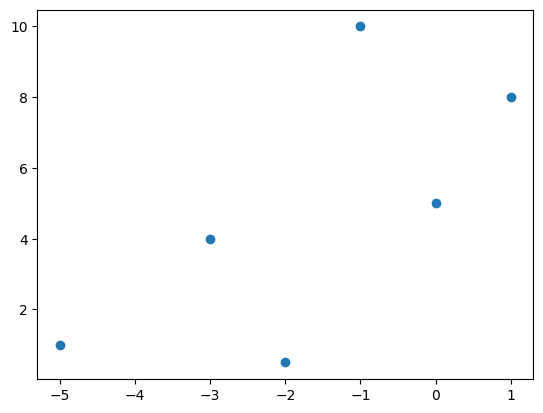

In [20]:
#puntos que tenemos
X = np.array([-1,0,1,-2,-3,-5])
Y = np.array([10.,5.,8.,.5,4,1])
plt.scatter(X,Y)

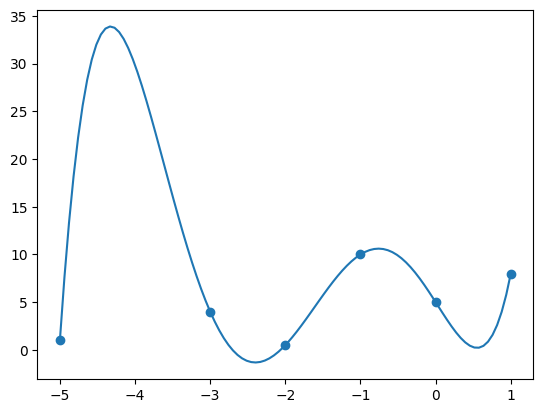

In [21]:
#Estos son los productorios
def lagrange(x,X,i):
    
    L = 1.
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L

#se hace la sumatoria de todos los productorios por el valor evaluado en la funcion
def interpolacionLagrange(x,X,Y):
    
    span = 0.
    
    for i in range(X.shape[0]):
        span += lagrange(x,X,i)*Y[i]
        
    return span

x0 = np.linspace(-5,1,100)
y0 = interpolacionLagrange(x0,X,Y)

plt.plot(x0,y0)
plt.scatter(X,Y)

SYMPY

In [22]:
# permite identificar la variable "x"
x = sym.Symbol('x',real=True)
#genere la funcion con la variable x y valores X y Y
f = interpolacionLagrange(x,X,Y)
#encuentra la funcion
f = sym.simplify(f)
f

0.568055555555556*x**5 + 4.92361111111111*x**4 + 10.7569444444444*x**3 - 0.923611111111111*x**2 - 12.325*x + 5.0

INTERPOLACIÓN NEWTON-GREGORY

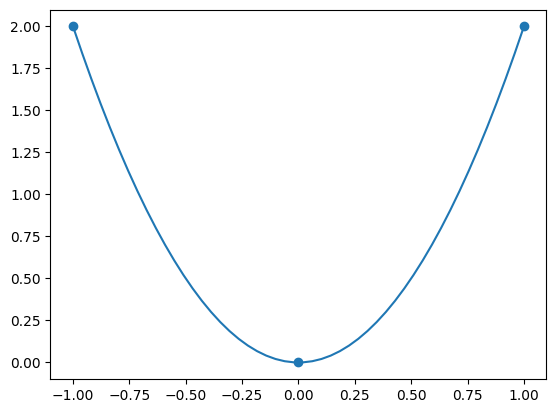

In [25]:
"Ejercicio Manual"
X = np.array([-1,0,1])
Y = np.array([2,0,2])

f1 = (Y[1]-Y[0])/(X[1]-X[0])
f2 = (Y[2]-Y[1])/(X[2]-X[1])

d2f = (f2-f1)/(X[2]-X[0])

x = np.linspace(-1,1,50)
y = Y[0]+f1*(x-X[0]) + d2f*(x-X[0])*(x-X[1])

plt.scatter(X,Y)
plt.plot(x,y)

DESCARGA DE DATOS - (NEWTON SIGUE DESPUES)

In [28]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file
    
Data = pd.read_csv(Path_,sep=',')
Data

Archivo descargado


,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


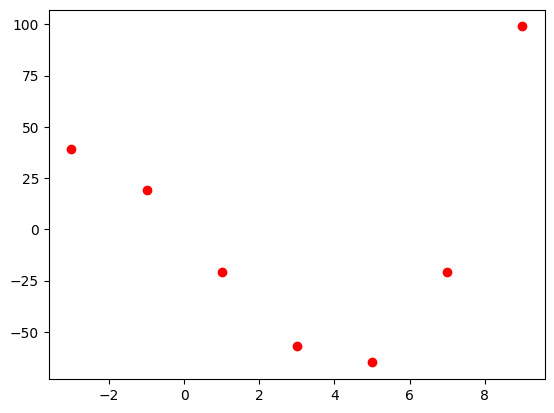

In [29]:
X = np.array(Data.X)
Y = np.array(Data.Y)
plt.scatter(X,Y,color='r')

In [35]:
#Matriz de las x-xi, que son los coeficientes ai
#Puede verse que es un polinomio de grado 3 al estar en la columna 4

Diff = np.zeros((X.shape[0], Y.shape[0]))
Diff[:,0] = Y
for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1]
        
Diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

C:\Users\danie\AppData\Local\Temp\ipykernel_4412\2344153514.py:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))


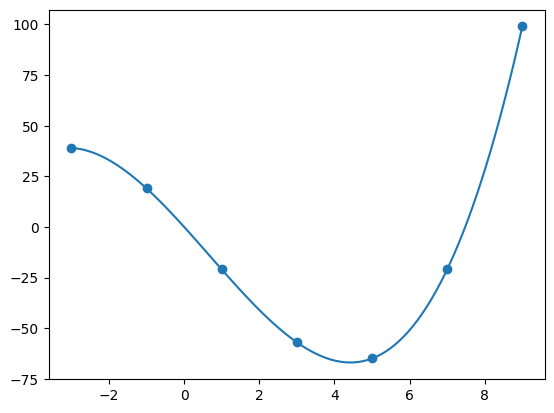

In [36]:
def InterpolacionNewton(X,Y,x):
    
    sum_ = Y[0]
    #creo la matriz que se ve arriva
    Diff = np.zeros(( X.shape[0],Y.shape[0] ))
    
    #Encuentro el h 
    h = X[1]-X[0]
    
    #agrego los primeros puntos como hicimos antes
    Diff[:,0] = Y

    poly = 1.
    # se calcula los todos los a
    for i in range(1,len(X)):
        #se calcula las diferencias de x-xi multiplicado a a
        poly *= (x-X[i-1])
        
        
        for j in range(i,len(X)):
            
            #se calcula cada diferencia en el numerador de la ecuacion de a
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 
            
        #se suma cada término de los polinomios
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))
        
    return sum_

#agregar los puntos
xt = np.linspace(np.min(X),np.max(X),100)
yt = []

for x in xt:
    yt.append(InterpolacionNewton(X,Y,x))
    
plt.scatter(X,Y)
plt.plot(xt,yt)